# Bethe Ansatz 2021

In [7]:
# qiskit 0.29.0

## Step 1: Dicke circuit

### Creating the circuit

In [8]:
from qiskit import *
from qiskit.circuit.library import CRYGate,CSwapGate,CPhaseGate,CXGate
from qiskit import Aer
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.quantum_info.operators import Operator
from itertools import permutations

import numpy as np
import math

np.set_printoptions(suppress=True)

In [9]:
def SCS(n,l,Circuit,qr):

    for i in range(1,l+1,1):        
        Circuit.cx(qr[n-i-1],qr[n-1])
        Circuit.append(CRYGate(2*np.arccos((i/n)**0.5)),[qr[n-1],qr[n-i-1]]) if n - i + 1 == n else Circuit.append(CRYGate(2*np.arccos((i/n)**0.5)).control(1),[qr[n-1],qr[n-i],qr[n-i-1]]) 
        Circuit.cx(qr[n-i-1],qr[n-1])
        # qs = []
        # if i != l:
        #     for j in range(n-i-1,n):
        #         qs.append(qr[j])
        # Circuit.barrier(qs)
    # Circuit.barrier()
        
        

def DickeState( n = 5,l = 3): # Comment will use the example of l = 3, n = 5
    qr = QuantumRegister(n)
    c = ClassicalRegister(n)
    # Prepare initial state with |00111>  
    Dicke = QuantumCircuit(qr,c)
    for i in range(n-l,n,1):
        Dicke.x(qr[i])
    Dicke.barrier()

    # Apply SCS to initial state
    for i in range(0,n-1): # n-l+l-1
        if i < n-l:
            SCS(n-i,l,Dicke,qr)
        else:
            SCS(n-i,n-i-1,Dicke,qr)
    
    # Dicke.measure(qr,c)
    return Dicke



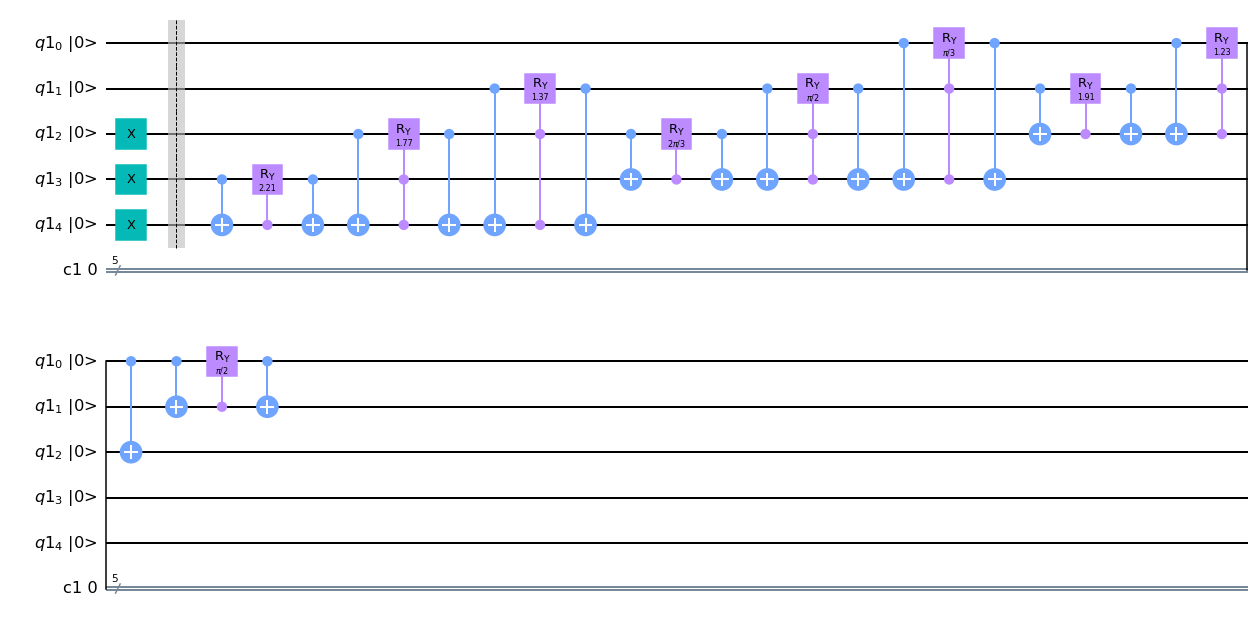

In [10]:
Dicke = DickeState(5,3)
Dicke.draw(output='mpl', initial_state=True)

{'00000': 114024}


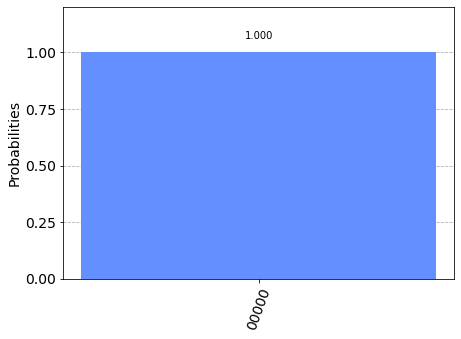

In [11]:
simulator = Aer.get_backend('qasm_simulator')
job_sim = execute(Dicke, backend=simulator, shots=114024)
result_sim = job_sim.result()
counts_sim = result_sim.get_counts(Dicke)
print(counts_sim)
plot_histogram(counts_sim)

In [12]:
sv=Statevector.from_label('0'*5)
new_sv=sv.evolve(Dicke)
(new_sv.data)

array([ 0.        +0.j, -0.        +0.j, -0.        +0.j,  0.        +0.j,
       -0.        +0.j,  0.        +0.j,  0.        +0.j,  0.31622777+0.j,
       -0.        +0.j,  0.        +0.j,  0.        +0.j,  0.31622777+0.j,
        0.        +0.j,  0.31622777+0.j,  0.31622777+0.j,  0.        +0.j,
       -0.        +0.j,  0.        +0.j,  0.        +0.j,  0.31622777+0.j,
        0.        +0.j,  0.31622777+0.j,  0.31622777+0.j,  0.        +0.j,
        0.        +0.j,  0.31622777+0.j,  0.31622777+0.j,  0.        +0.j,
        0.31622777+0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j])

## Step 2: Create permutation label with phase

In [13]:
def CheckPermutation(lst,M):
    array = list(lst.keys())
    l = list(permutations(range(1, M+1)))
    base = ['0']*M
    def toM(base,i):
        base[i-1] = '1'
        return ''.join(base)
    for entry in l:
        label = ''
        for i in range(0,M):
            label = label + toM(base,entry[i])
            base = ['0']*M
        if label not in array:
            print(False)
            return False
    return True

Construct circuit

In [14]:
# def CreatePermutation(M):
#     q = QuantumRegister(M**2)
#     c = ClassicalRegister(M**2)
#     permutation = QuantumCircuit(q,c)
#     registers = []
#     for i in range(0,M):
#         register= []
#         for j in range(0,M):
#             register.append(q[i*M+j])
#         registers.append(register)

#     permutation.x(registers[0][0])

#     k = 0
#     permutation.x(registers[k+1][k+1])

#     def ASWAP(circuit,k,i): # SWAP k+1,k+1 and k,k+1 

#         angle =  np.arcsin(1/(k+2)**0.5)
#         #  angle =  np.arccos(1/(k+2)**0.5)
#         circuit.cx(registers[k+1][i],registers[k][i])
#         circuit.rz(-math.pi,registers[k+1][i])
#         circuit.ry(-angle,registers[k+1][i])
#         circuit.cx(registers[k][i],registers[k+1][i])
#         circuit.ry(angle,registers[k+1][i])
#         circuit.rz(math.pi,registers[k+1][i])
#         circuit.cx(registers[k+1][i],registers[k][i])

#         return circuit

#     permutation = ASWAP(permutation,k,k+1)
#     permutation.append(CSwapGate(),[registers[k][k+1],registers[k][k],registers[k+1][k]])
#     permutation.barrier()

#     k = 1
#     permutation.x(registers[k+1][k+1])
#     permutation = ASWAP(permutation,k,k+1)
#     permutation.append(CSwapGate(),[registers[k][k+1],registers[k][k-1],registers[k+1][k-1]])
#     permutation.append(CSwapGate(),[registers[k][k+1],registers[k][k],registers[k+1][k]])
#     permutation.barrier()

#     permutation = ASWAP(permutation,k-1,k+1)
#     permutation.append(CSwapGate(),[registers[k-1][k+1],registers[k-1][k-1],registers[k-1+1][k-1]])
#     permutation.append(CSwapGate(),[registers[k-1][k+1],registers[k-1][k],registers[k-1+1][k]])

#     permutation.measure(q,c)
#     return permutation

In [15]:

def Phase(i,j,a,ks):
    if type(ks) != list:
        raise TypeError("ks should be a list contraining bethe roots for ks")

    return 2 *np.arctan((a*math.sin((ks[i]-ks[j])/2))/(a*math.cos((ks[i]-ks[j])/2)-math.cos((ks[i]+ks[j])/2))) 

def ASWAP(circuit,k,i,registers): # SWAP k+1,k+1 and k,k+1 
        angle =  np.arcsin(1/(k+2)**0.5)
        #  angle =  np.arccos(1/(k+2)**0.5)
        circuit.cx(registers[k+1][i],registers[k][i])
        circuit.rz(-math.pi,registers[k+1][i])
        circuit.ry(-angle,registers[k+1][i])
        circuit.cx(registers[k][i],registers[k+1][i])
        circuit.ry(angle,registers[k+1][i])
        circuit.rz(math.pi,registers[k+1][i])
        circuit.cx(registers[k+1][i],registers[k][i])
        return circuit

def CreatePermutation(M,phase):
    q = QuantumRegister(M**2)
    c = ClassicalRegister(M**2)
    permutation = QuantumCircuit(q,c)
    registers = []
    for i in range(0,M):
        register= []
        for j in range(0,M):
            register.append(q[i*M+j])
        registers.append(register)

    permutation.x(registers[0][0])
    
    for k in range(0,M-1):
        permutation.x(registers[k+1][k+1])
        for i in range(k,-1,-1):
            permutation = ASWAP(permutation,i,k+1,registers)
            for j in range(0,k+1):
                permutation.append(CSwapGate(),[registers[i][k+1],registers[i][j],registers[i+1][j]])
            for j in range(0,k+1):
                if(phase):
                    permutation.append(CPhaseGate(Phase(k+1,j,1.1)+math.pi),[registers[i][k+1],registers[i+1][j]])
        permutation.barrier()

    permutation.measure(q,c)
    return permutation


In [16]:
perm3 = CreatePermutation(3,False)
# perm3.draw(output='mpl', initial_state=True)

In [17]:
simulator = Aer.get_backend('qasm_simulator')
def SimulateLst(circuit,simulator,shots):
    job_sim = execute(circuit, backend=simulator, shots=shots)
    result_sim = job_sim.result()
    counts_sim = result_sim.get_counts(circuit)
    return counts_sim
SimulateLst(perm3,simulator,20000)


{'001010100': 3341,
 '010001100': 3328,
 '010100001': 3401,
 '100001010': 3293,
 '001100010': 3239,
 '100010001': 3398}

In [20]:
perm5 = CreatePermutation(5,False)
array = SimulateLst(perm5,simulator,20000)
CheckPermutation(array,5)

True

### For now, I successfully generate permutation labels. 
### Next I will implement Faucet ancillas

In [59]:
def EntireBetheCircuit(L = 4, M= 2, kLst = [] ,phase = False, measure = False):
    q = QuantumRegister(L + M**2 + M + 1)
    c = ClassicalRegister(M**2)
    Bethe = QuantumCircuit(q,c)

    # Dicke State
    for i in range(L-M,L,1):
        Bethe.x(q[i])
    # Apply SCS to initial state
    for i in range(0,L-1): # n-l+l-1
        if i < L-M:
            SCS(L-i,M,Bethe,q)
        else:
            SCS(L-i,L-i-1,Bethe,q)     

    #Create Permutation label
    registers = []
    for i in range(0,M):
        register= []
        for j in range(0,M):
            register.append(q[L + i*M+j])
        registers.append(register)
    Bethe.x(registers[0][0])
    
    for k in range(0,M-1):
        Bethe.x(registers[k+1][k+1])
        for i in range(k,-1,-1):
            Bethe = ASWAP(Bethe,i,k+1,registers)
            for j in range(0,k+1):
                Bethe.append(CSwapGate(),[registers[i][k+1],registers[i][j],registers[i+1][j]])
            for j in range(0,k+1):
                if(phase):
                    Bethe.append(CPhaseGate(Phase(k+1,j,1,kLst)+math.pi),[registers[i][k+1],registers[i+1][j]])

    #Faucet method to apply phase on system qubits
    def applyFacuet(M=M):
        Bethe.barrier()
        for i in range(0,M):
            for j in range(0,M):
                Bethe.append(CPhaseGate(kLst[i]),[registers[j][i],fq[j]])
        Bethe.barrier()

    fq = []
    for i in range(L+M**2,L+M**2+M):
        fq.append(q[i])
        Bethe.x(q[i])

    for i in range(0,L-1):        
        Bethe.append(CXGate().control(1),[fq[1],q[i],fq[0]])
        applyFacuet()
        Bethe.x(fq[0])
        Bethe.append(CXGate().control(1),[fq[0],q[i+1],fq[1]])
        Bethe.x(fq[0])
    applyFacuet()

    #Disentangle the system from the permutation label
    for k in range(M-2,-1,-1):
        for i in range(0,k+1,1):
            for j in range(k,-1,-1):
                Bethe.append(CSwapGate(),[registers[i][k+1],registers[i][j],registers[i+1][j]])
            Bethe = ASWAP(Bethe,i,k+1,registers)
        Bethe.x(registers[k+1][k+1])
    Bethe.x(registers[0][0])

    #Measure permutation regisers
    if measure:
        for i in range(M):
            for j in range(M):
                Bethe.measure(registers[i][j],c[i+j])
    
    return Bethe


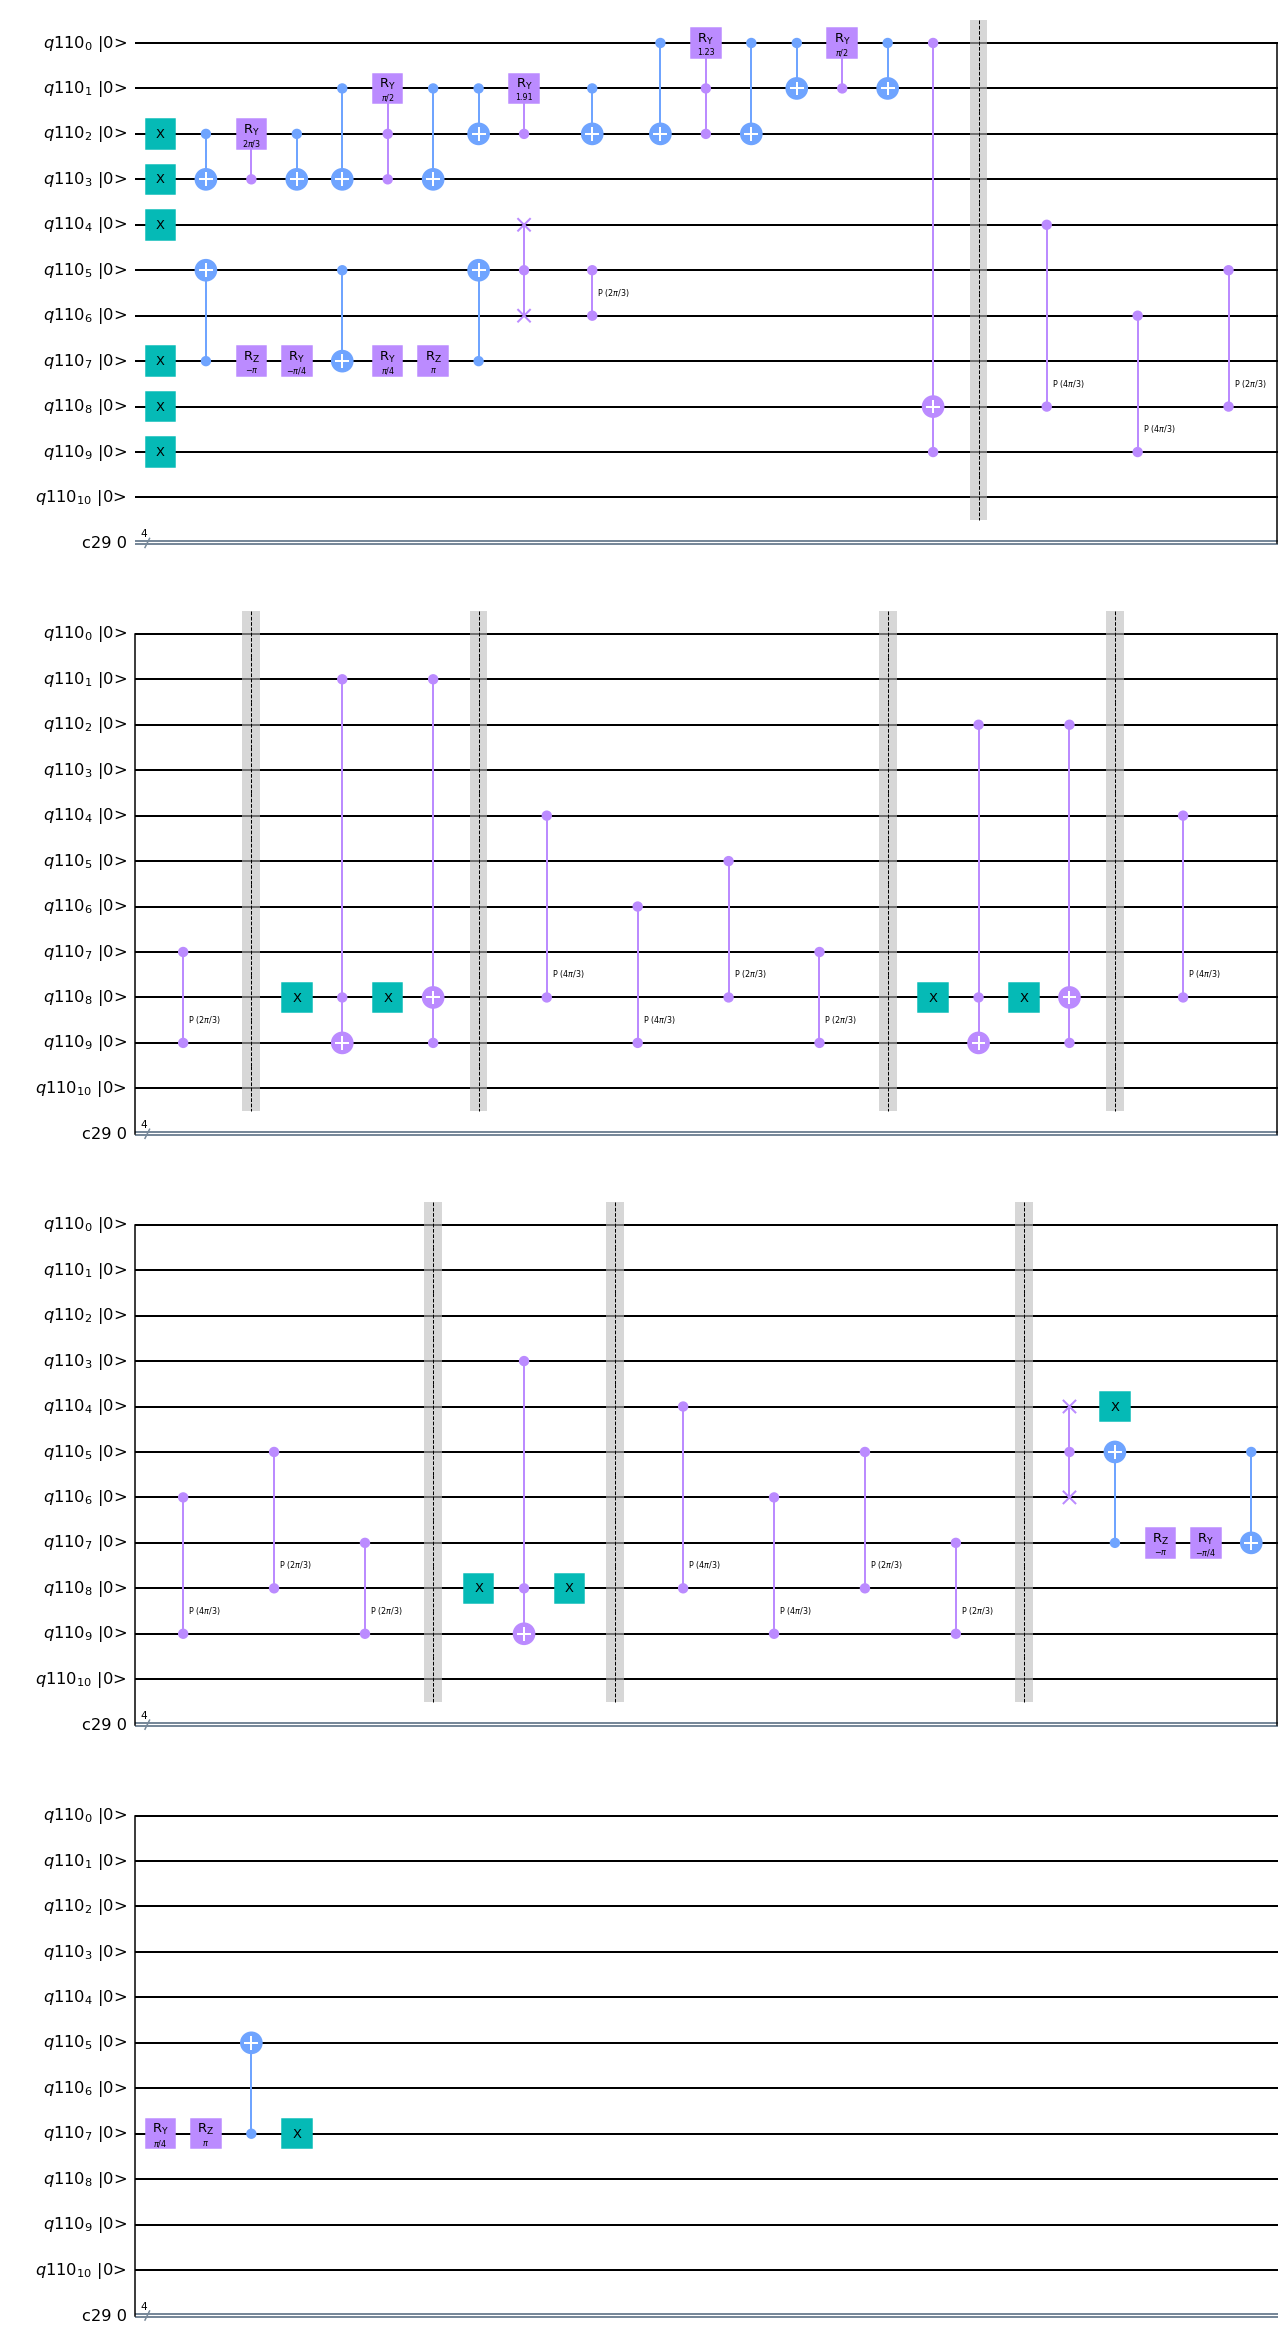

In [83]:
Bethe42 = EntireBetheCircuit(kLst=[4*math.pi/3,2*math.pi/3],phase=True)
Bethe42.draw(output='mpl', initial_state=True)

In [65]:
sv = Statevector.from_label('0'*(4+2**2+2))
state = sv.evolve(Bethe42)
state
state.data[0:2**4]

array([ 0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.10206207+0.1767767j ,
        0.        +0.j        , -0.20412415-0.35355339j,
        0.10206207+0.1767767j ,  0.        +0.j        ,
        0.        +0.j        ,  0.10206207+0.1767767j ,
       -0.20412415-0.35355339j,  0.        +0.j        ,
        0.10206207+0.1767767j ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ])

# My Problem
 1. phase and angle we apply in permutation is different
 2. work ancila

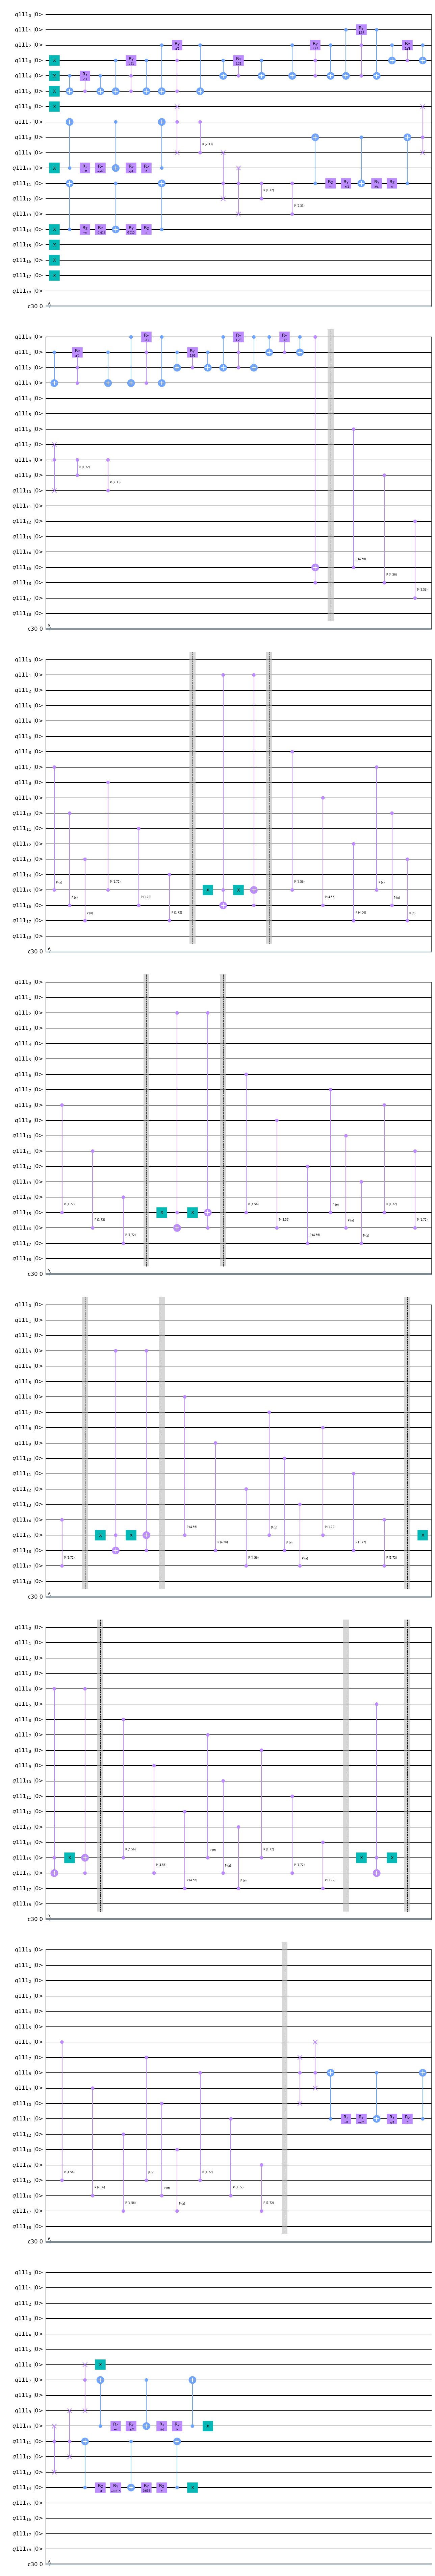

In [84]:
Bethe63 = EntireBetheCircuit(L=6,M=3,kLst=[4.56042, math.pi, 1.72277],phase= True)
Bethe63.draw(output='mpl', initial_state=True)

In [81]:
sv = Statevector.from_label('0'*(6+3**2+3)) #L =6, m =3
state = sv.evolve(Bethe63)
state
state.data[0:2**6]

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])